# Introduction to Machine Learning

This Jupyter notebook was created for the 2018 AIS Intro to Machine Learning workshop and is designed to not only explain how the most common algorithms work, but also how to use Python libraries to train these algorithms to generate predictions from real datasets.

## What is Machine Learning?

Machine learning is an area in AI that is focused on using mathematical and statistical techniques to "give computers the ability to learn" without being programmed explicitly. For example, while it is not possible to come up with a 100% accurate deterministic algorithm that can differentiate between an image of a dog or a cat, it is possible to use machine learning to enable a machine to predict based on data whether an image contains a dog or a cat.

## When to Use Machine Learning

Machine learning is not for problems where we need a deterministic algorithm or an exact solution, but for problems where need to make predictions or come up with approximations. Several problems such as image classification or sentiment analysis that cannot be solved with a deterministic algorithm can be solved "approximately" with machine learning.

## Types of Machine Learning

- **Supervised learning**: used to describe algorithms that train on data with given labels or target values to develop models that can generalize to unseen data. This approach can be described as "learning from labeled examples". This is like preparing for a test with sample problems and answers already given. 
- **Unsupervised learning**: used to describe algorithms that train on data without already given labels or target values. The most common example is clustering. Say you are given multiple data points that represent dogs or cats but your algorithm does not know which point is a dog and which is a cat. Then the algorithm will have to rely on unsupervised techniques to separate the points into two classes.
- **Semi-supervised learning**: falls somewhere between supervised and unsupervised learning.

### Types of Problems
- **Classification**: The goal is to train a model to identify a data point as belonging to a certain discrete class from a set of possible classes. Example: training a model to classify images as containing cars, planes, cats, frogs, dogs, etc.
- **Regression**: The goal is to train a model to use features to predict a continouous outcome or target variable. Example: training a model to predict the stock prices of a company based on many different factors.
- **Clustering**: The goal is to separate data points into groups based on similar characteristics.

## Getting Set Up

In this notebook, we will be using various Python libraries to train and test machine learning algorithms on datasets. The following software tools/libraries are necessary for this tutorial:

- **Python** (>= 2.7 or >= 3.3) (If you have 2.7 or 3.3 or higher either should be fine)
- **numpy** (for linear algebra)
- **pandas** (For working with datasets)
- **scipy** (For math/linear algebra)
- **scikit-learn** (for machine learning algorithms)

To install a library with Anaconda you can just go to your terminal and give the following command:

**conda install library_name**

For example, to install numpy you can just type:

**conda install numpy**

And to install scikit-learn you can type:

**conda install sklearn**

If you do not have Anaconda, you can just use pip instead. 

### Full List of Installation Commands

### Anaconda:

- **conda install sklearn** (should install numpy and scipy as well)
- **conda install matplotlib**
- **conda install seaborn**

### Using Pip:
- **pip install pandas**
- **pip install -U sklearn[alldeps]** (installs all dependencies of sklearn, including numpy and scipy)
- **pip install matplotlib**
- **pip install seaborn**


###  Optional libraries (for cool plots!)
I will be using these libraries throughout this tutorial to visualize the data, but you don't need these to run machine learning algorithms:

- **Matplotlib**
- **Seaborn**

### How to use this notebook
This notebook has several cells with Python code in them. To run a cell, click on the cell and then press **SHIFT + ENTER**. You can also go to the "Cell" menu and select "Run Cells" but it is a bit faster and easier to just use the **SHIFT + ENTER** keyboard shortcut.

## Importing Libraries

Here we will import the libraries that we will need for now.

In [1]:
import numpy as np # for linear algebra
import pandas as pd # for CSV file I/O and dataset manipulation
import sklearn # for machine learning

# The libraries below are optional:
import matplotlib.pyplot as plt # plt is a short name we can use to refer to this library
import seaborn as sns # sns is a short name we can use to refer to this library
%matplotlib inline

## Brief Numpy Tutorial
Before we start working with our dataset using **Pandas** and **SciKit-Learn**, we should go over **NumPy**, which is the foundation for the other libraries that we will be using. NumPy is a library for numerical computations and scientific computing in Python. It features several powerful linear algebra tools for matrix operations and is good for storing data in a tabular format.

### Numpy Arrays (Basically Matrices)
NumPy allows us to store objects called NumPy arrays, which are essentially matrics. The cell below shows how to initialize a NumPy array that represents a 3 x 3 matrix. To create a NumPy array, we pass in a list of lists, which each list inside the bigger list representing a row of the matrix.

In [2]:
matrix_A = np.array([[1,2,3], [4,5,6], [7,8,9]])
matrix_A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Here is another example of a NumPy array representing a 3 x 3 matrix.

In [3]:
matrix_B = np.array([[10,11,12], [13,14,15], [16,17,18]])
matrix_B

array([[10, 11, 12],
       [13, 14, 15],
       [16, 17, 18]])

In a similar manner, we can create NumPy array representing a 2 x 2 matrix.

In [4]:
matrix = np.array([[1,0],[0,1]])
matrix

array([[1, 0],
       [0, 1]])

If we want to create a one-dimensional NumPy array of linearly spaced values we can do the following:

In [5]:
np.linspace(1, 20, 20)   # parameters linspace(start, end, number_of_steps)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.])

Now that we have some NumPy arrays, we can perform all kinds of operations on them!

### Indexing Numpy Arrays
We can use 2D indexing to access specific elements of our NumPy array and 1D indexing to access a specific row (which is a 1D NumPy array). It is really important to note that NumPy indexing starts as zero (as in most programming languages).

In [6]:
matrix_A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [7]:
matrix_A[0][0] # Grabs the element in the top left corner

1

In [8]:
matrix_A[0][1] # Grabs the element 2

2

In [9]:
matrix_A[0] # Grabs the first row of the matrix

array([1, 2, 3])

In [10]:
matrix_A[2][2] # Grabs the element in the bottom right corner

9

### Matrix Operations

In [11]:
matrix = np.array([[1,0],[0,1]])
matrix

array([[1, 0],
       [0, 1]])

#### Finding the Determinant of a Matrix

In [12]:
np.linalg.det(matrix)

1.0

In [13]:
np.linalg.det(matrix_A)

-9.51619735392994e-16

#### Finding the Inverse of a Matrix

In [14]:
np.linalg.inv(matrix_A)

array([[ 3.15251974e+15, -6.30503948e+15,  3.15251974e+15],
       [-6.30503948e+15,  1.26100790e+16, -6.30503948e+15],
       [ 3.15251974e+15, -6.30503948e+15,  3.15251974e+15]])

#### Multiplying Matrices

In [5]:
matrix_A.dot(matrix_B)

array([[ 84,  90,  96],
       [201, 216, 231],
       [318, 342, 366]])

These are just a few of the many operations that you can perform with NumPy. As you will see in the rest of this notebook, NumPy is fundamental to the functionality of the other libraries that we will be using for machine learning.

## Reading in the Data - Titanic Dataset

For this part of the tutorial, we will be using a classic dataset that contains information about passengers on 
the Titanic and tells us whether or not they survived. Our goal is to build an accurate machine learning model that can determine, based on some information about a passenger, whether or not that passenger survived the Titanic. This dataset is available in the Github repo for this tutorial and you can also download it from here:

http://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html


### Using Pandas to read and process data from CSV file

Pandas is a powerful library that allows us to create dataframe objects by reading in data from multiple sources, including CSV files and HTML tables. Pandas also allows us to process, query, and perform other operations on a dataframe object. We will begin by creating a dataframe called "titanic_data" by reading in the data from a CSV file called "titanic.csv".

In [5]:
titanic_data = pd.read_csv("titanic.csv")

Now that we have created a dataframe, we can take a look at its contents with the head() function.

In [6]:
titanic_data.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


If we want to get information about the type of data in each column we can call the info() function.

In [7]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.5+ KB


As you can see, this is relatively small dataset (perfect for beginners!) with only 887 entries and only 8 columns. One of the convenient things about pandas is that we can select different columns of this dataframe object and perform functions on these columns in very simple syntax. For example:

In [8]:
titanic_data[['Name', 'Age']]  #If we want to see the values in the Name and Age columns

,Name,Age
0,Mr. Owen Harris Braund,22.0
1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,38.0
2,Miss. Laina Heikkinen,26.0
3,Mrs. Jacques Heath (Lily May Peel) Futrelle,35.0
4,Mr. William Henry Allen,35.0
5,Mr. James Moran,27.0
6,Mr. Timothy J McCarthy,54.0
7,Master. Gosta Leonard Palsson,2.0
8,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,27.0
9,Mrs. Nicholas (Adele Achem) Nasser,14.0


We can also get specific rows of a dataframe by index as demonstrated below.

In [9]:
titanic_data.iloc[0] # Gets the first row of the index

Survived                                        0
Pclass                                          3
Name                       Mr. Owen Harris Braund
Sex                                          male
Age                                            22
Siblings/Spouses Aboard                         1
Parents/Children Aboard                         0
Fare                                         7.25
Name: 0, dtype: object

We can also select single columns and get the first few rows of those columns.

In [10]:
# If we just want to see the first five rows of the age column
titanic_data['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

We can also perform queries on the dataframe using syntax similar to Python list comprehension. For example, if we want to get all the passengers that are 21 or older we can do the following: 

In [11]:
titanic_data[titanic_data['Age'] >= 21] # Selects subset of data with passengers 21 or older

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
11,1,1,Miss. Elizabeth Bonnell,female,58.0,0,0,26.5500
13,0,3,Mr. Anders Johan Andersson,male,39.0,1,5,31.2750


### Understanding the Data (features vs. target variable)

Based on what the results of the head() and info() calls, we know that the data contains 8 variables, which consist of 7 features and 1 target that we are trying to predict.

Features:

- **Pclass**: A number from 1-3 corresponding to the class (upper, middle, or lower class) that a passenger belonged to.
- **Name**: The name of the passenger.
- **Sex**: The gender (male/female) of the passenger.
- **Age**: The age of the passenger (in years).
- **Siblings/Spouses Aboard**:  The number of siblings/spouses of a passenger aboard the Titanic.
- **Parents/Children Aboard**: The number of parents/children of a passenger aboard the Titanic.
- **Fare**: The fare that the passenger had to pay.

Target variable:
- **Survived**: Contains a 1 if the passenger survived and a 0 if the passenger did not.

If we want summary statistics for the data we can call the describe() function.

In [13]:
titanic_data.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


### Quick Data Visualization
Using the pairplot function from the seaborn library we can see how each variable is related.

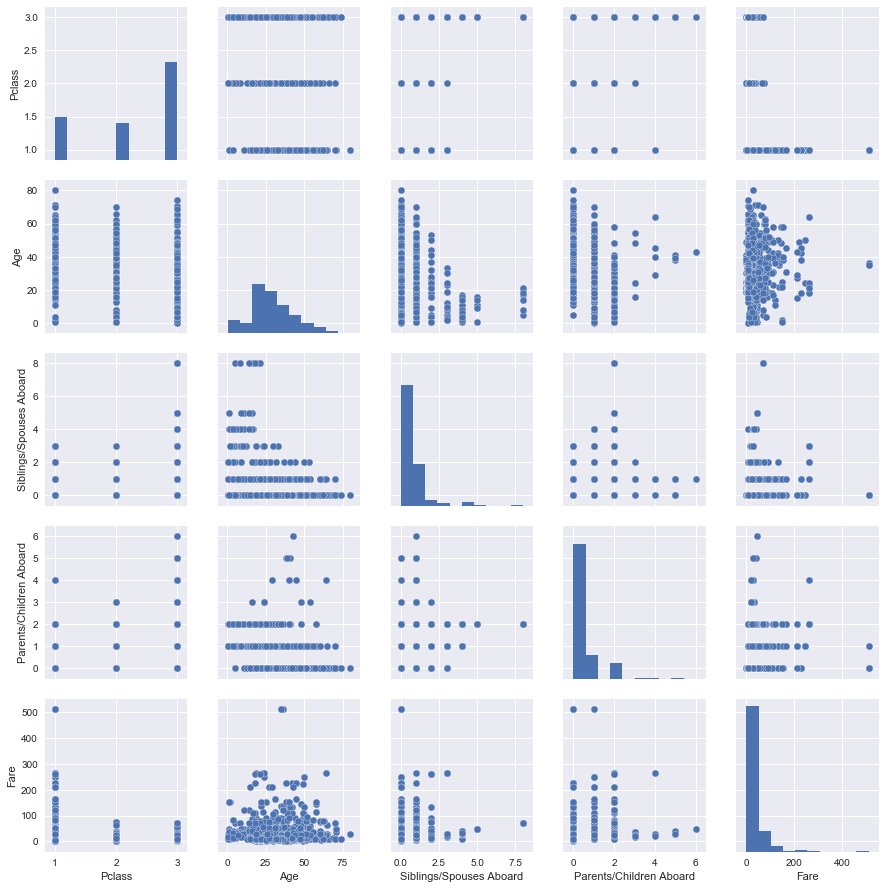

In [12]:
sns.pairplot(titanic_data.drop(['Survived'], axis=1))

## Cleaning Up the Data
One of the most common problems with unprocessed data is missing or null values. Before we can run an algorithm on the data, we need to deal with these missing or null values. Let's check if our data has any null values.

In [13]:
titanic_data.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

Perfect! Since our data has no null values, we can continue to the next step of preprocessing, where we will encode nominal values.

### Label Encoding
In order for a machine learning algorithm to work on this data, we need transform it into a dataset with all numbers. So we need to convert the Gender column to numbers corresponding to the values "male" and "female". We can easily do this with scikit-learn's LabelEncoder.

In [14]:
titanic_data['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
titanic_data['Sex'] = encoder.fit_transform(titanic_data['Sex'])

In [16]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,1,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,0,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,1,35.0,0,0,8.0500


After looking at the dataframe again, we can see that the LabelEncoder has replaced all values of "male" with 1 and all values of "female" in the "Sex" column with 0. At this point, we have done the basic preprocessing necessary and all that's left is to drop the Name column since we will not be dealing with textual data in this tutorial. We will do that in the next section where we split the data into training and testing sets.

## Train, Test, Split! 

The next step in processing our data is to split our data into a training and testing set so that we can train our machine learning algorithms on the training set and the evaluate the performance of each algorithm on the testing set. We can do this using scikit-learn's **train_test_split** tool.

In [17]:
from sklearn.model_selection import train_test_split

X = titanic_data.drop(['Name', 'Survived'], axis=1)#Sets X equal to the dataframe without the Name and Survived columns
y = titanic_data['Survived'] # Sets y equal to the values in the Survived column 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) #splits the data 

### What's going on in the code above?

There seems to be a lot going on in the code above, but its actually quite simple. We did the following:

- Created a dataframe **X** to represent the **features of the data** that we will train the model on (we have dropped the Name column since we cannot use it).
- Created a dataframe **y** to represent the **target variable** (whether or not the person survived).
- Created four dataframes using train_test_split:
    - **X_train**: represents the features in training data.
    - **X_test**: represents the features in testing data.
    - **y_train**: represents the target values in training data.
    - **y_test**: represents the target values in testing data.
    
### How train_test_split works

The train_test_split function takes our features (X) and our target values (y) and splits them into training and testing sets.
- **test_size**: Represents the proportion of the data that will be used to test the data.
- **random_state**: Just a random seed for randomly performing the split. 

Let's take a look at the four dataframes we created just to convince ourselves!

#### X_train - training data features

In [18]:
X_train.head(10) # Passing a value of 10 into the head function displays the first 10 rows

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
446,1,1,52.0,0,0,30.5000
478,2,1,37.0,0,0,0.0000
328,3,0,28.0,2,0,23.2500
798,1,1,11.0,1,2,120.0000
90,3,1,20.0,0,0,7.8542
838,1,0,30.0,0,0,31.0000
181,3,1,9.0,4,2,31.3875
465,3,1,22.0,0,0,7.7250
792,1,0,49.0,0,0,25.9292
69,2,1,32.0,0,0,10.5000


#### X_test - testing data features

In [20]:
X_test.head(10)

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
296,1,1,47.0,0,0,30.5000
682,2,1,25.0,1,2,41.5792
535,3,1,69.0,0,0,14.5000
644,1,1,56.0,0,0,35.5000
623,2,1,57.0,0,0,12.3500
39,3,0,14.0,1,0,11.2417
529,3,1,17.0,1,1,7.2292
585,3,1,22.0,0,0,8.0500
723,3,0,28.0,0,0,7.7375
141,3,0,24.0,1,0,15.8500


#### y_train - training data target values

In [21]:
y_train.head(10)

446    1
478    0
328    1
798    1
90     0
838    1
181    0
465    0
792    1
69     0
Name: Survived, dtype: int64

#### y_test - testing data target values

In [22]:
y_test.head(10)

296    1
682    0
535    0
644    1
623    0
39     1
529    0
585    0
723    1
141    1
Name: Survived, dtype: int64

## Training ML Algorithms on the Titanic Data!

Now that we've processed the data, we can finally train machine learning algorithms on this data and even evaluate the performance of each algorithm!

### K-Nearest Neighbors (KNN) - A Lazy Learning Algorithm

K-Nearest Neighbors is a very simple machine learning algorithm and it is good for demonstrating ML to beginners. It was originally designed to solve **classification** problems but the algorithm can be tweaked to solve **regression** problems as well. Here we will focus on using KNN to classify a person as having survived or not survived the Titanic.

### How it Works
K-Nearest Neighbors works by taking a data point and looking at its "k" nearest neighbors (k is an arbitrary constant that we can tune later) and then classifying the data point based on the majority of the classes of its k nearest neighbors. The simplified steps of the algorithm are described below:

1. **Training stage**: Just load all of the data! (seriously, that's it!)
2. **Classifying a point**: Find the k nearest neighbors to the point using a **distance metric** and look at the classes of these neighbors. Predict the class of the point based on the class that appears most often in the neighbors.

### A Visual Example: What class does the green point belong to?
Based on the idea behind KNN, if the blue points represent people that survived and the red points represent people that did not survive, which class can we say the green point likely belongs to? 
<img src="knn_example.png" style="width: 1500px; height: 800px;"/>


#### Distance Metrics:
- Euclidean distance (most common): This is what we know as the straight-line distance between two points. This distance is essentially the square root of the sums of the squares of the differences between each coordinate dimension of the two points. 
\begin{equation*}
d(p,q) = \sqrt{\sum_{i=1}^n (q_i - p_i)^2}
\end{equation*}

- Manhattan distance: This metric computes the distance between two points in a grid based on only vertical or horizontal line paths.
\begin{equation*}
d(p, q) = \sum_{i=1}^n |q_i - p_i|
\end{equation*}

- Minkowski distance: This metric is a generalization of Euclidean and Manhattan distance with a parameter value of p = 2 representing Euclidean distance. Given the points:

\begin{equation*}
X = (x_1, x_2, ...., x_n)
\end{equation*}
\begin{equation*}
Y = (y_1, y_2, ...., y_n)
\end{equation*} 

The Minkowski distance of order p is:

\begin{equation*}
d(X, Y) = (\sum_{i=1}^n |x_i - y_i|^{p})^{1/p}
\end{equation*}

### Training a KNN Classifier in Python

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

As you can see above, calling fit from our KNN model produces an output where we get the details of the instance of the KNeighborsClassifier class. There are several parameters here that may look unfamiliar and the only one that we have manually set is n_neighbors. Here is what the other parameters mean:

- **metric**: (default = minkowski) the distance metric that is to be used. Note that we could provide our own distance metric in the form of a function.
- **p**: (default = 2) represents the parameter for Minkowski distance in the equation above. A value of p = 2 just means we are dealing with Euclidean distance (what we normally think of as straight-line distance). 
- **n_jobs** (default = 1): The number of parallel threads to use in training the model. Since we have a very small dataset, we can just stick with the default value.
- **metric_params** (default=None): If we specified a custom function for our distance metric, we would place the parameters of that function here.
- **weights** (default=uniform): This just specifies how much weight to give to each neighbor when generating predictions. If we specified 'distance' instead as the value, then points that are closer to the specified point would have more weight in determining the point's class.
- **algorithm** (default=auto): specifies the algorithm used for searching through points to compute nearest neighbors. I would recommend sticking with 'auto' and letting the software decide which algorithm is best. 

For more information, you can check out the SciKit-Learn documentation page for this classifier here: 
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


### Evaluating our Model
Remember how we split the data into training and testing sets? Here we are going to evaluate our model by having it generate predictions from the test data without seeing the target values in the test data. Now that we have trained our model, we will call the predict function on the test features to generate predictions and compare these predictions to the target values in the test set.

### Generate Predictions on the Test Set Input Features

We can use the **predict** function to generate predictions a sample of data. We can apply this function to our test data to get predictions. First let's take a look at the head of **X_test** to remind ourselves what values it contains.

In [21]:
X_test.head()

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
296,1,1,47.0,0,0,30.5000
682,2,1,25.0,1,2,41.5792
535,3,1,69.0,0,0,14.5000
644,1,1,56.0,0,0,35.5000
623,2,1,57.0,0,0,12.3500


Now let's call the **predict** function on X_test.

In [22]:
pred = KNN_model.predict(X_test) # predict on the test set
pred # pred is basically a numpy array of 1's and 0's

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0])

As we can see above, the predict function basically returns a NumPy array of 0's and 1's for each row in **X_test**. The 1's correspond to rows where the algorithm predicted that person survived and the 0's correspond to rows where the algorithm predicted that person did not survive.

### Compare Predictions to Actual Test Outputs (Compute Evaluation Metrics)
Now that we have some predictions on the test inputs, we need to compare these predictions to the correct outputs from our test set by computing evaluation metrics such as accuracy.

In [23]:
from sklearn.metrics import classification_report, accuracy_score # import metrics for evaluation
print(classification_report(pred, y_test)) # prints out a classification report
print("Our model achieved an accuracy of {} % on the test data".format(100*accuracy_score(pred, y_test)))
# prints out an accuracy score as a percentage

             precision    recall  f1-score   support

          0       0.77      0.76      0.76       168
          1       0.59      0.61      0.60        99

avg / total       0.70      0.70      0.70       267

Our model achieved an accuracy of 70.0374531835206 % on the test data


Looking at the accuracy, 70% is not bad considering that we used a very simple algorithm. Here is what the other performance measures mean:

- **precision**: the ratio of correctly predicted positive observations (true positives) to the total predicted positive observations. For example in the row labeled 1 above, this is the number of times our model correctly predicted someone survived divided by the total number of times our model predicted someone survived.
- **recall**: the ratio of correctly predicted positive observations to all observations actually in that class. For example, in row 1, this is number of times our model correctly predicted someone survived divided by the number of people that actually survived. 
- **f1-score**: the harmonic mean of precision and recall. The harmonic mean is often roughly equivalent to the average of two values in most cases.

The f1-score is given by the following equation:

\begin{equation*}
F_{1} = 2 \bullet \frac{precision \bullet recall} {precision + recall}
\end{equation*}

## Scaling the Data (Standardizing) to Improve Results
In general, KNN works best when the input features are all on the same scale so that each feature makes an equal contribution to the distance metric. To improve our results with KNN, we can use SciKit-Learn's StandardScaler module to standardize all of the features. The concept of standardization comes from a standard normal distribution or bell curve (plotted below). The standard normal distribution can be graphed using the following equation (the PDF or probability density function of the distribution):

\begin{equation*}
f(z) = e^{(\frac {-z^2}{2})}
\end{equation*}


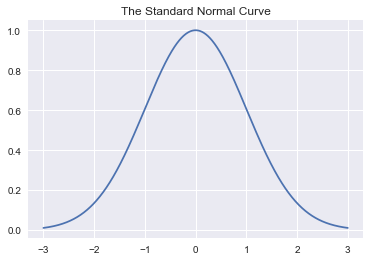

In [39]:
z_values = np.linspace(-3,3,num=1000)
function_values = np.exp(-1 * (z_values **2 )/2) # Plotting the function above
plt.plot(z_values, function_values)
plt.title("The Standard Normal Curve")

Some of the key things to note about this distribution is that:
- The average value or mean is 0.
- The standard deviation, which measures how far off values are from the mean, is 1.
- 99% of the values fall between -3 and 3 (this is super important!)

If the values of a certain distribution are normally distributed with a mean $\mu$ and a standard deviation $\sigma$, any value $x$ in the distribution can be scaled into standardized scores known as z-scores, that can then be used for the standard normal distribution. 

\begin{equation*}
z = \frac {x - \mu} {\sigma}
\end{equation*}

Even if the values are not normally distributed, we can still use z-scores to standardize the values and produce a common scale on which to compare values of other features. The StandardScaler from SciKit-Learn converts the values of each feature to z-scores to standardize them.

In [24]:
from sklearn.preprocessing import StandardScaler # For scaling the data

In order to conveniently combine operations into a single classifier, SciKit-Learn has a convenient module called Pipeline.

In [25]:
from sklearn.pipeline import Pipeline

In [26]:
pipeline = Pipeline([ ('scaler', StandardScaler()) , ('knn', KNeighborsClassifier(n_neighbors=5)) ])
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))])

In [27]:
pred = pipeline.predict(X_test)
print(classification_report(pred, y_test))
print("Our model achieved an accuracy of {} % on the test data".format(100*accuracy_score(pred, y_test)))

             precision    recall  f1-score   support

          0       0.83      0.79      0.81       174
          1       0.64      0.70      0.67        93

avg / total       0.77      0.76      0.76       267

Our model achieved an accuracy of 76.02996254681648 % on the test data


## Finding the Optimal Number of Neighbors (Value of K) Using Cross Validation
As you can see from the results above, applying a standard scaler to the data improved the accuracy of the KNN classifier by 6%. However, you may have noticed that we were only taking 5 neighbors into consideration when we trained the model. The number of neighbors is a hyperparameter, and in machine learning, models can be improved by tuning such hyperparameters to optimize performance. Here, we will try to find the value of k for which the model performs best.

### What is cross validation? 
Cross validation is a technique for evaluating model performance that is similar to what we have been doing so far. A common form of cross validation, known as **k-fold cross validation**, involves splitting a dataset into a single multiple sections called **folds** (k folds to be exact!) and in a single iteration, using **k-1 folds for training** and just **one fold for testing**. This process is then repeated **k times** with a different fold being used as test data each time. The values of the evaluation metrics for each **iteration** can then be averaged to get a more robust measure of a model's performance. This practice is better than using the same test set again and again because optimizing a model's performance on one specific test set in effect makes that test set a part of the training set. 

### SciKit-Learn's cross_val_score function
Fortunately, SciKit-Learn has a very convenient function for computing the cross validation scores for a given model. This function returns a list (array) with the cross validation scores for the model. Here is an example:

In [33]:
from sklearn.model_selection import cross_val_score # Module for cross validation
cross_val_score(pipeline, X, y, scoring='accuracy', cv=5) # The cv parameter is the number of folds/iterations to use

array([0.76404494, 0.7752809 , 0.83615819, 0.83615819, 0.85875706])

In order to get a robust estimate of our model's performance, we can compute the average score for each of the cross validation folds. We can then repeat this process for different values of k and find the value for which this average is the highest. 

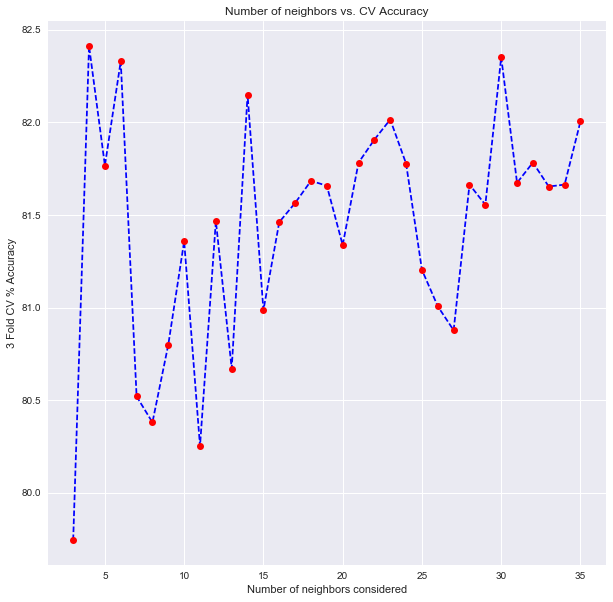

In [34]:
k_range = range(3,36) # We will test all integer values in this range for k
accuracies = []

def average(X):
    
    return sum(X)/len(X)

for k in k_range:
    
    knn_pipeline = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=k))])
    cv_results = cross_val_score(knn_pipeline, X, y, scoring='accuracy', cv=40) # I am using 40-fold CV
    avg_percent_accuracy = 100*average(cv_results)
    accuracies.append(avg_percent_accuracy)

plt.figure(figsize=(10,10))
plt.plot(k_range, accuracies, color='blue', linestyle='dashed', marker='o', markerfacecolor='red')
plt.xlabel("Number of neighbors considered")
plt.ylabel("3 Fold CV % Accuracy")
plt.title("Number of neighbors vs. CV Accuracy") 

Based on the plot above, we can see that the optimal number of neighbors to consider is 4. The cross-validation accuracy peaks at this value and only decreases and then oscillates when the number of neighbors increases beyond this value. 

## Decision Trees - Naive, but readable models

Decision trees are models that are a bit more complex than the KNN algorithm, but are nevertheless readable and can perform well on simple datasets. The decision tree algorithm essentially takes all of the data and literally creates a tree of conditional statements that can then be used to classify a data point. Say for example, that you wanted to determine based on several conditions, whether or not a friend would play tennis with you. The image below represents a possible decision tree for this scenario.

<img src="dtree.png" style="width: 600px; height: 500px;"/>

### How Decision Trees Work
Now we know what a decision tree is, but the question is how does our algorithm know exactly how to construct a decision tree for a given dataset? This is where the mathematics behind this algorithm really comes into play. Decision trees use a criterion called **information gain (IG)** to determine which feature to use at each split in the tree. The algorithm begins at the root of the tree and then splits the data on the feature that results in the largest IG. Basically, the algorithm tries to maximize **information gain (IG)**. We continue this process until the leaves are pure, meaning the samples at each leaf belong to the same class, allowing us to actually make a good class prediction.

#### Defining Information Gain
The information gain at each split in the tree is defined as:
\begin{equation*}
IG(D_p, f) = I(D_p) - \sum_{j=1}^m \frac {N_j}{N_p} I(D_j)
\end{equation*}

Where:

- $ f $ represents the feature on which to perform the split.
- $ D_p $ and $ D_j $ are the samples of the parent and jth child node.
- $ I $ is the impurity measure, which tells us about the distribution of classes in a sample.
- $ N_j $ is the number of samples in the jth child node and $ N_p $ is the number of samples in the parent.

This equation implies that there can be an arbitrary number of children for a given node, but most libraries, especially SciKit-Learn, will implement binary decision trees for simplicity.

#### The main idea behind the information gain equation
The equation above may seem a bit overwhelming to look at but all we really need to understand is the main idea behind it. The basic idea behind the equation is that information gain is defined as the difference between the impurity of the parent and that of all of the child nodes. The next step is to define what is meant by impurity.

#### What is Impurity?
You might have noticed that we defined information gain in terms of an **impurity measure** $I$ and may be wondering what this really means. Impurity is just a measure of how pure or impure a sample is in terms of class distribution. A **completely pure sample** would be one in which **all observations had the same class**. For example, if we picked out a sample from our Titanic dataset **where all of the individuals survived**, then this sample would be **completely pure**. Impurity just measures how far away a sample is from having the same classes for each observation. There are three measures of impurity:

- **Entropy** - Defined as:
\begin{equation*}
I_H(t)=-\sum_{i=1}^c p(i|t)log_2 p(i|t)
\end{equation*}

In the equation above $p(i|t)$ represents the proportion of observations that belong to a class $c$ for a node $t$. When interpreting entropy, keep in mind that if a sample is completely pure (all observations have the same class) the entropy would just equal 0, and if we had a 50-50 split, the entropy would be 1 (maximum value). 

- **Gini index** - Defined as:
\begin{equation*}
I_G(t) = 1 - \sum_{i=1}^c p(i|t)^2
\end{equation*}

Just like entropy, the Gini index has a maximum value if the classes are distributed in a 50-50 split and a minimum value if all the observations belong to one class.

- **classification error** - Defined as:
\begin{equation*}
I_E = 1 - max(p(i|t))
\end{equation*}

Note that the max function just takes the class with the highest proportion in the case of a binary class situation (where there are two classes). So if we had a 50-50 split between classes the classification error would be 
1 - 0.5 = 0.5. If all the observations fell into one class, this value would be 1 - 1 = 0.

#### High-Level Overview of the Algorithm for Building a Decision Tree
The algorithm for building a decision tree performs the following steps recursively at each node or split in the data. For our impurity measure we will use entropy. Starting at the root:
1. Calculate the impurity (entropy) of the current sample (initially the entire dataset). This is basically $I(D_p)$.
2. Find the feature $f$ that maximizes the IG based on the impurity of the current sample. 
3. Split the current sample into two nodes with smaller samples in the tree based on the condition(s) for the feature $f$.
4. Continue recursively for each impure node until the tree is complete.

For this workshop we are just providing a general overview of the decision tree algorithm, but for a step-by-step example on how to build a decision tree by hand, you should check out this page: http://www.doc.ic.ac.uk/~sgc/teaching/pre2012/v231/lecture11.html

### Training a Decision Tree Classifier in Python

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dtree_model = DecisionTreeClassifier(max_depth=7, criterion='entropy')
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Explanation of the Parameters
- **criterion** - represents the impurity measure to use for selecting features for the tree.
- **max_depth** - represents the maximum depth of the decision tree.
- **random_state** - represents the random seed used to build the tree. Here we did not pass in a value so the library just picks a default seed for us.
- **min_samples_leaf** - the minimum number of samples to be present at each node. If we pass in an int, SciKit-Learn treats it as a number of samples, and if we pass in a float, SciKit-Learn interprets it as a percentage.
- **min_samples_splits** - the number of samples required to split an internal node in the decision tree.

### Evaluating our Decision Tree Model
In the same procedure as we used to evaluate our KNN model, we will have out decision tree generate predictions on the test data and compare these predictions to the expected target values for the test set.

In [37]:
pred = dtree_model.predict(X_test)
print(classification_report(pred, y_test))
print("Our model achieved an accuracy of {} % on the test data".format(100*accuracy_score(pred, y_test)))
#print("50 Fold Cross Validation Accuray: {} %".format(
        #100*average(cross_val_score(dtree_model, X, y, scoring='accuracy', cv=50))))

             precision    recall  f1-score   support

          0       0.92      0.77      0.84       197
          1       0.55      0.80      0.65        70

avg / total       0.82      0.78      0.79       267

Our model achieved an accuracy of 77.90262172284645 % on the test data


### Tuning the Parameters of our Decision Tree Using Grid Search

Based on the results above, it seems that our decision tree did slightly better than our KNN model without parameter tuning in terms of accuracy. If we tune the parameters of the decision tree, we may be able to do even better. Because we are going to test more than one type of parameter, we can use a common practice known as **grid search** where we test all the different combinations of parameters for a given range of values and then find the parameters for which the model performs the best using cross-validation. SciKit-Learn has a module known as **GridSearchCV** that we can use for this process.

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
max_depths = [4,5,6,7,8,9,10] # A list of max_depth values to consider
#min_samples_splits = list(np.linspace(0.1, 1.0, 10, endpoint=True))
min_samples_leafs = list(np.linspace(0.1, 0.5, 5, endpoint=True))
param_grid = {'max_depth': max_depths, 'min_samples_leaf': min_samples_leafs}

dtree_grid = GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', min_samples_split=2), 
                          param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=5,
                         verbose=1)
dtree_grid.fit(X, y)

Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=5)]: Done 350 out of 350 | elapsed:    0.4s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=5,
       param_grid={'min_samples_leaf': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5], 'max_depth': [4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

Now that the grid is done fitting to the data, we can find the parameters of the best estimator.

In [41]:
dtree_grid.best_estimator_ # Gives us the best decision tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
dtree_grid.best_score_ # Gives us the score of the best decision tree

0.7857948139797069

### Visualizing the Decision Tree (Extra/Optional)
If we want to visualize the decision tree, we could use the code below, which requires the pydot library.

In [43]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X_train.columns)
features

['Pclass',
 'Sex',
 'Age',
 'Siblings/Spouses Aboard',
 'Parents/Children Aboard',
 'Fare']

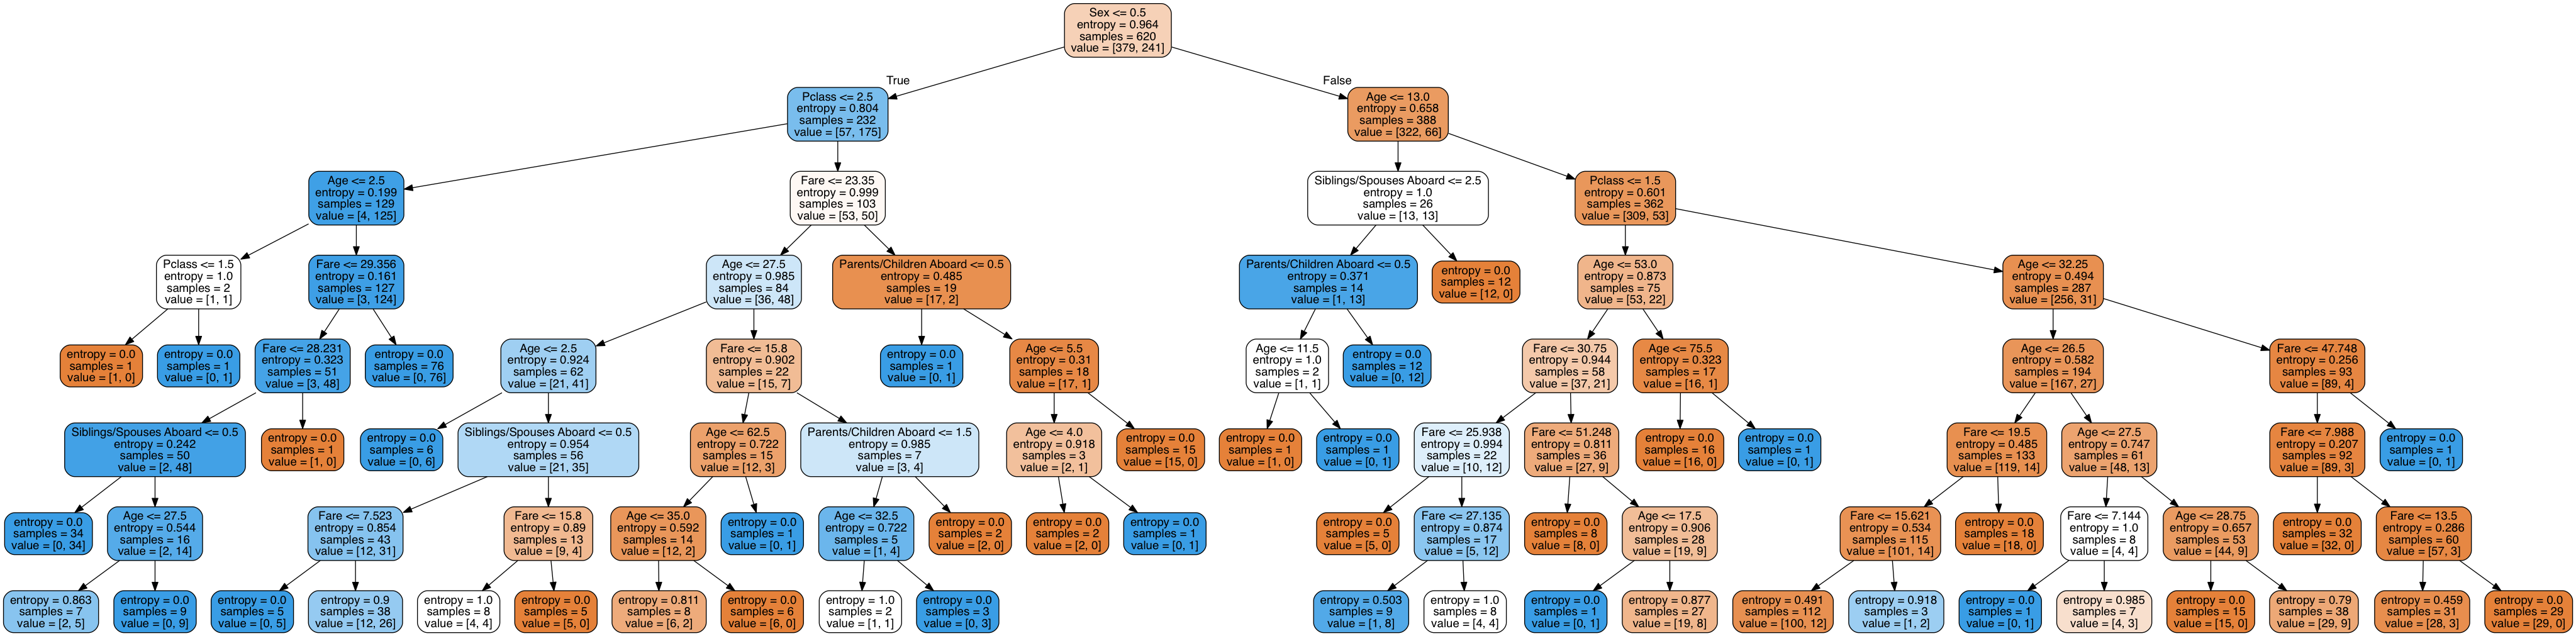

In [44]:
dot_data = StringIO()  
export_graphviz(dtree_model, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

Because our decision tree is quite complicated it is tough to see everything but for smaller decision trees, this visualization tool is more effective.

## Logistic Regression - A simple, yet reliable model
Unlike what the name suggest, **logistic regression** is designed specifically for **classification** and is especially suited for **binary classification** problems. The real **"regression"** in logistic regression involves finding the best values in a weight vector that is used to compute a weighted sum of the input features. This weighted sum is then passed to a function called the **sigmoid function** also known as the **logistic function**. This function has a special property where it takes any real-valued input and outputs a continuous value between 0 and 1. In general, if the output of this function is below 0.5 we can assign the input to class 0 and if the output is greater than or equal to 0.5, we can assign the input to class 1.

### How Logistic Regression Works
The **logistic function** is defined as:

\begin{equation*}
\phi (z) = \frac {1} {1+e^{-z}}
\end{equation*}

To better illustrate the concept of the **logistic function**, the function has been plotted below in the interval [-10, 10]. Notice how the function forms an S-shaped curve with horizonal asymptotes at y = 0 and y = 1. What's special about this function is that it can take any real value and output a value between 0 and 1, which is really useful for representing probabilities.

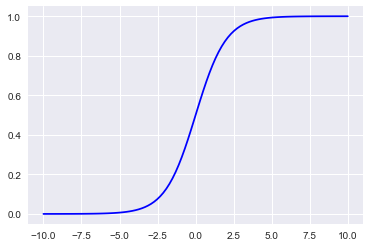

In [55]:
X_values = np.linspace(-10, 10, 100)
y_values = 1/(1 + np.exp(-1*X_values))
plt.plot(X_values, y_values, color='Blue')

#### Where this function comes from - log odds (logit)
This function comes from the concept of the odds ratio in probability, which for a probability p, of a given event, is defined as:
\begin{equation*}
odds(p) = \frac {p} {(1-p)}
\end{equation*}

For example, if you hear someone say the odds of an event are 1:1, then that means there is a 50% chance of that event happening.

By taking the natural logarithm (ln) of both sides, we can define the **logit** or **log odds** function. 
\begin{equation*}
logit(p) = ln \frac {p} {(1-p)}
\end{equation*}

The **logistic function** which we defined earlier is actually the **inverse** of the **logit** function. 

#### Applying the Logistic Function to a Weighted Sum of Features
The logistic regression model is based on the following equation:

\begin{equation*}
logit \ (p(y=1 \ | \ x)) = w_0 x_0 + w_1 x_1 + ... + w_m x_m = \sum_{i=0}^n w_m x_m = w^T x
\end{equation*}

Where:
- $ x = (x_0, x_1, ..., x_n) $ represents the input in the form of a vector of features given to the model.
- $ p(y=1 \ | \ x) $ is the conditional probability that given an input $ x $, the data point belongs to the class $ y = 1 $. For our case, this is probability that given the values of variables like Gender, Age, Class, etc. that a person survived the Titanic.
- $ w = (w_0, w_1, ..., w_n) $ represents a vector of numerical weights that will be used to compute the weighted sum of the inputs.
- $ w^T x $ is just a short way to write the weighted sum of the features using matrix notation. Since x and w are actually just one dimensional matrices (vectors), this is basically equivalent to taking the dot product of x and w (multiply each feature by each corresponding weight and add them up!).

By applying the **logistic function** to **both sides** of the equation above we get the following result:

\begin{equation*}
p(y=1 \ | \ x) = \phi(w^T x)
\end{equation*}

This basically means that the output that comes from applying this function to a weighted sum of the features gives us the probability that an observation belongs to the class 1. In our case, the raw output from the model when making a prediction will give us the probability that a person survived the titanic. Hence, if this probability is **greater than our equal to 0.5** (**50% or more chance** they survived) then our model predicts that the person survived. Otherwise, the model predicts that the person did not survive.

#### How to logistic regression generates class predictions
The class predictions that come out of a logistic regression model are based on the following equation:

$$
y =
  \begin{cases}
    1 &\text{if } \phi(w^T x) \ge 0.5\\
    0 &\text{if } \phi(w^T x) < 0.5
  \end{cases}
$$

#### How the model learns the weights
The process of "learning" in logistic regression involves determining the **optimal weights** in the weight vector to **minimize** a cost function defined below for a weight vector $w$:

\begin{equation*}
Cost(w) = \sum_{i=0}^n \frac {1} {2} (\hat y_i - y_i)^2 + \frac {\lambda} {2} \sum_{j=1}^m |w_{j}^2|
\end{equation*}

Note that the first part of this function is essentially half the sum of squared errors between the predicted values (classes) denoted as $\hat y_i$ for the ith observation in the data and the actual values, denoted as $y_i$ for the ith observation in the data. For a given weight vector $w$ and an input $x_i$ we know that $\hat y_i = \phi(w^T x_i)$ based on the equation for the logistic regression algorithm. The second half of the equation, $ \frac {\lambda} {2} \sum_{j=1}^m w_{j}^2 $ is known as the regularization term and is used to control the values of weights by adding a constant times the square of the magnitude of the weight vector to the cost function.

#### Why do we call it a cost function? What is the purpose of a cost function?
The cost function is used to quantify how bad our classifier is doing at making predictions on training data. Cost functions are sometimes called **loss functions** but the idea is the same - both tell us how bad our classifier is doing and in general, we want to **minimize** the values of these functions, which is like minimizing a cost or loss. In algorithms that involve learning numerical weights, cost functions give our algorithms a metric for which to learn the optimal weights.

#### How do we actually minimize the cost function
The process of minimizing the cost function involves an optimization process known as **gradient descent**. The idea behind gradient descent is that we can exploit the fact that our cost function is quadratic by looking at the direction in which our cost function is changing with respect to the weights (basically a derivative) and update our weights in a manner that causes our cost function to continue decreasing until we reach the global minimum, or the vertex of our quadratic curve. The mathematical details of this optimization method are out of the scope of this workshop, but are commonly used in deep learning and if you are interested, you can read more here: http://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html

#### What is regularization? 
Regularization is a common practice in machine learning used to control **overfitting** - the situation in which a model becomes too constrained to the patterns in the training data and fails to generalize to unseen data. Regularization works by adding a term that involves the magnitude of the weight vector to the cost function. Doing so penalizes larger weights and prevents any one feature from receiving too much weight in the model. There are two common types of regularization used for logistic regression and those are L2 and L1 regularization. 

- **L2 Regularization**: This form of regularization is the same as regularization used in the original cost function above and involves the regularization term $ \frac {\lambda} {2} \sum_{j=1}^m w_{j}^2 $.
- **L1 Regularization**: This form of regularization involves a different regularization term $ \frac {\lambda} {2} \sum_{j=1}^m |w_{j}| $. The difference here is that we are summing the absolute values of each weight and multipyling by a constant. L1 regularization tends to produce weight vectors where less important features have weights that are close to, if not exactly zero. For this reason, this type of regularization is often good for feature selection.

The constant related to logistic regression that we use to optimize the amount of regularization is referred to as $ C $ and is related to the regularization parameter $ \lambda $ by the following equation:

\begin{equation*}
C = \frac {1} {\lambda}
\end{equation*}

When training a logistic regression model in SciKit-Learn we can pass in values for C and specify the type of regularization that we want to use.

### Training a Logistic Regression Model in Python
Let's try training a logistic regression model on the data and see how it performs.

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
log_model = LogisticRegression(C=3, penalty='l2')
log_model.fit(X_train, y_train)

LogisticRegression(C=3, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

We can actually look at the values of the weights for our model as follows:

In [47]:
log_model.coef_

array([[-1.00512849, -2.80071987, -0.0353948 , -0.47167566, -0.11163915,
         0.00336012]])

### Comparing Weights For L1 and L2 Regularization

In order to understand the differences in weights produced by L1 and L2 regularization, we will train two logistic regression models - one with L1 regularization and another with L2 regularization. Then we will compare the weights for each model.

In [48]:
log_model_l1 = LogisticRegression(C=3, penalty='l1') # L1 Regularization
log_model_l2 = LogisticRegression(C=3, penalty='l2') # L2 Regularization
log_model_l1.fit(X_train, y_train)
log_model_l2.fit(X_train, y_train)

LogisticRegression(C=3, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
log_model_l1.coef_

array([[-1.13207479e+00, -2.90443664e+00, -4.05655953e-02,
        -4.98942368e-01, -1.13662784e-01,  2.35898762e-03]])

In [50]:
log_model_l2.coef_

array([[-1.00512849, -2.80071987, -0.0353948 , -0.47167566, -0.11163915,
         0.00336012]])

As we can see above, L1 regularization tends to produce much smaller weights than L2 regularization.

### Evaluating our Logistic Regression Model

In [51]:
pred = log_model.predict(X_test)
print(classification_report(pred, y_test))
print("Our model achieved an accuracy of {} % on the test data".format(100*accuracy_score(pred, y_test)))
print("50 Fold Cross Validation Accuray: {} %".format(
        100*average(cross_val_score(log_model, X, y, scoring='accuracy', cv=10))))

             precision    recall  f1-score   support

          0       0.89      0.78      0.83       189
          1       0.58      0.76      0.66        78

avg / total       0.80      0.77      0.78       267

Our model achieved an accuracy of 77.15355805243446 % on the test data
50 Fold Cross Validation Accuray: 79.59547724435365 %


### Scaling the Data and Comparing Results
We can try scaling the data using standardization and see if this improves the performance of our model.

In [52]:
log_pipeline = Pipeline([('scaler', StandardScaler()), ('log', LogisticRegression(C=3))])
log_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log', LogisticRegression(C=3, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [53]:
pred = log_pipeline.predict(X_test)
print(classification_report(pred, y_test))
print("Our model achieved an accuracy of {} % on the test data".format(100*accuracy_score(pred, y_test)))
print("50 Fold Cross Validation Accuray: {} %".format(
        100*average(cross_val_score(log_pipeline, X, y, scoring='accuracy', cv=50))))

             precision    recall  f1-score   support

          0       0.88      0.77      0.82       189
          1       0.57      0.74      0.65        78

avg / total       0.79      0.76      0.77       267

Our model achieved an accuracy of 76.40449438202246 % on the test data
50 Fold Cross Validation Accuray: 79.74754901960783 %


## Finding the Best Regularization Parameters Using Grid Search
Scaling the data did not improve the accuracy of our classifier, but we can almost always make progress by optimizing the regularization parameters. The main parameters to optimize are the type of regularization (L1 or L2) and the value of the regularization constant C. Because we are going to test more than one type of parameter, we can again use **grid search** to optimize these parameters.

In [54]:
from sklearn.model_selection import GridSearchCV
param_grid = {'penalty': ['l1', 'l2'], 'C': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]} # dictionary containing range of values to test
lr_grid = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=8, 
                    verbose=1)
lr_grid.fit(X, y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=8)]: Done  80 out of  80 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=8,
       param_grid={'C': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

We can now find the best estimator and its parameters as follows:

In [55]:
lr_grid.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
lr_grid.best_score_

0.7948139797068771

## Combining the Classifiers with Majority Voting

We have trained three separate classifiers on the model and some of them score below slightly 80% accuracy. However, we can combine the predictions of each classifier using a majority voting system, creating a combined classifier that performs better than each of the individual classifiers. For example, if our KNN model predicts that a person would not survive, but the decision tree and logistic regression models predict that the same person would survive, then the majority voting classifier will predict that the person would survive.

### Simple Approach: Write a Function

A simple way to implement this majority voting system is by creating a function that takes in a list of classifiers and a dataframe or numpy array with data on which to make a prediction.

In [57]:
from statistics import mode
def majority_vote_predict(classifiers, input_data):
    
    predictions = []
    
    for classifier in classifiers:
        
        predictions.append(classifier.predict(input_data)[0])
    
    return mode(predictions) # Return the most common class prediction (majority vote)

In [58]:
X_test.iloc[0].values.reshape(1,-1)

array([[ 1. ,  1. , 47. ,  0. ,  0. , 30.5]])

In [61]:
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning) # ignores deprecation warnings
classifiers = [lr_grid.best_estimator_, dtree_model, pipeline]
majority_vote_predict(classifiers, X_test.loc[10].values.reshape(1,-1))

1

### Better Approach: Create a Class (More Complex but Scalable)
If we want our majority voting classifier to function like a SciKit-Learn classifier with its own fit and predict methods, we can implement it as a class that inherits from SciKit-Learn's BaseEstimator and ClassifierMixin classes. The implementation below comes from Sebastian Raschka's book, **Python Machine Learning**, and allows us to get the kind of functionality that we are looking for.

In [62]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import six
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator

class MajorityVoteClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, classifiers, vote='classlabel', weights=None):
        
        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights
        
    def fit(self, X, y):
        
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
    
    
        return self
    
    def predict(self, X):
        
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:  # 'classlabel' vote

            #  Collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X)
                                      for clf in self.classifiers_]).T

            maj_vote = np.apply_along_axis(
                                      lambda x:
                                      np.argmax(np.bincount(x,
                                                weights=self.weights)),
                                      axis=1,
                                      arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote
        
    def predict_proba(self, X):
        
        probas = np.asarray([clf.predict_proba(X) for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba
    
    def get_params(self, deep=True):
        
        if not deep:
            return super(MajorityVoteClassifier, self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in six.iteritems(self.named_classifiers):
                for key, value in six.iteritems(step.get_params(deep=True)):
                    out['%s_%s' % (name, key)] = value
        return out

In [63]:
maj_vote_classifier = MajorityVoteClassifier([LogisticRegression(C=1, penalty='l1'),
                                             Pipeline([('scaler', StandardScaler()), 
                                                       ('knn', KNeighborsClassifier(n_neighbors=4))]),
                                             DecisionTreeClassifier(max_depth=7, criterion='entropy', random_state=12,
                                                                   )])

In [64]:
# The code below gives a lot of harmless warnings and we would like to ignore them
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning) # ignores deprecation warnings

accuracy = average(cross_val_score(maj_vote_classifier, X, y, scoring='accuracy', cv=10))

In [65]:
print("10 Fold Cross Validation Accuray: {} %".format(100*accuracy))

10 Fold Cross Validation Accuray: 83.21024855294519 %


## Converting our algorithm into a function
Now that we have trained an algorithm that can predict whether or not a person survived the titanic with over 83% accuracy, we can write functions that tell us the chances of survival for a hypothetical person on the titanic.

In [66]:
titanic_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [67]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,1,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,0,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,1,35.0,0,0,8.0500


Let's go ahead and train the majority voting classifier on the entire training data.

In [68]:
maj_vote_classifier.fit(X, y) 

MajorityVoteClassifier(classifiers=[LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False), Pipeline(memory=None,
 ...         min_weight_fraction_leaf=0.0, presort=False, random_state=12,
            splitter='best')],
            vote='classlabel', weights=None)

In [69]:
def predict_survival(Pclass, Sex, Age, num_siblings_spouses, num_parents_children, fare, predict_prob=False):
    
    if(Sex == 'Female' or Sex == 'female'):
        Sex = 0
    else:
        Sex = 1
        
    input_data = pd.DataFrame({'Pclass':[Pclass], 
                               'Sex':[Sex],
                                'Age':[Age],
                                  'Siblings/Spouses Aboard':[num_siblings_spouses],
                                  'Parents/Children Aboard':[num_parents_children],
                                  'Fare':[fare]})
    cols = ['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare'] # Used to reorder columns
    input_data = input_data[cols] # Reorders columns
    prediction = maj_vote_classifier.predict(input_data)
    
    if predict_prob:
        probability = maj_vote_classifier.predict_proba(input_data)[0][1]
        return 'The individual would have a {} % chance of survival'.format(100*probability)
    else:
        if prediction[0] == 1:
            return 'Would have survived'
        else:
            return 'Would not have survived'
    

In [71]:
predict_survival(3, 'Male', 14, 0, 0, 7.92, predict_prob=True)

'The individual would have a 17.688376826679843 % chance of survival'

In [73]:
predict_survival(3, 'Male', 14, 0, 0, 7.92, predict_prob=False)

'Would not have survived'

## Next Steps and Where to Go From Here
In this tutorial we introduced three basic machine learning algorithms as well as common practices in machine learning such as cross-validation, parameter tuning, and combining classifiers using majority voting. Machine learning is a vast and rapidly advancing field so there are many other algorithms out there that we did not cover. It's worth trying out several of these different algorithms on this same dataset and seeing if you can do even better than 83% accuracy. Some additional algorithms and approaches that we did not cover include:

- **Support Vector Machines (SVMs)**
- **Bagging**
- **Adaptive Boosting (Adaboosting)**
- **Random Forests**
- **Gradient-Boosted Trees**
- **Naive Bayes**
- **Neural Networks**

If you are interested in working with more datasets, check out Kaggle, a platform for hosting machine learning competitions and datasets, and the UCI Machine Learning Repository.

- **Kaggle**: https://www.kaggle.com/
- **UCI Machine Learning Repository**: https://archive.ics.uci.edu/ml/index.php

## Questions? Want to learn more about machine learning?
Here is my contact information in case if you have any additional questions:
- **Name: Amol Mavuduru**
- **UTD email: axm168430@utdallas.edu**